<a href="https://colab.research.google.com/github/chieri7/Machine-Learning-Final-Code/blob/main/Machine_Learning_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

Raw Data

In [4]:
# Raw Data
path = "Lung Cancer Dataset.csv"
df = pd.read_csv(path)

In [5]:
df.head(5)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [6]:
df.shape

(5000, 18)

Observation : There are 5000 rows, 18 columns including 1 target column in this data set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [8]:
df.duplicated().sum()

np.int64(0)

No duplicates found

In [9]:
df.isna().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


No null rows found

**Summary Statistics**

In [10]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [11]:
# Counts
df['PULMONARY_DISEASE'].value_counts(normalize= True)

,proportion
PULMONARY_DISEASE,
NO,0.5926
YES,0.4074


This is a fairly Balanced dataset

<Axes: >

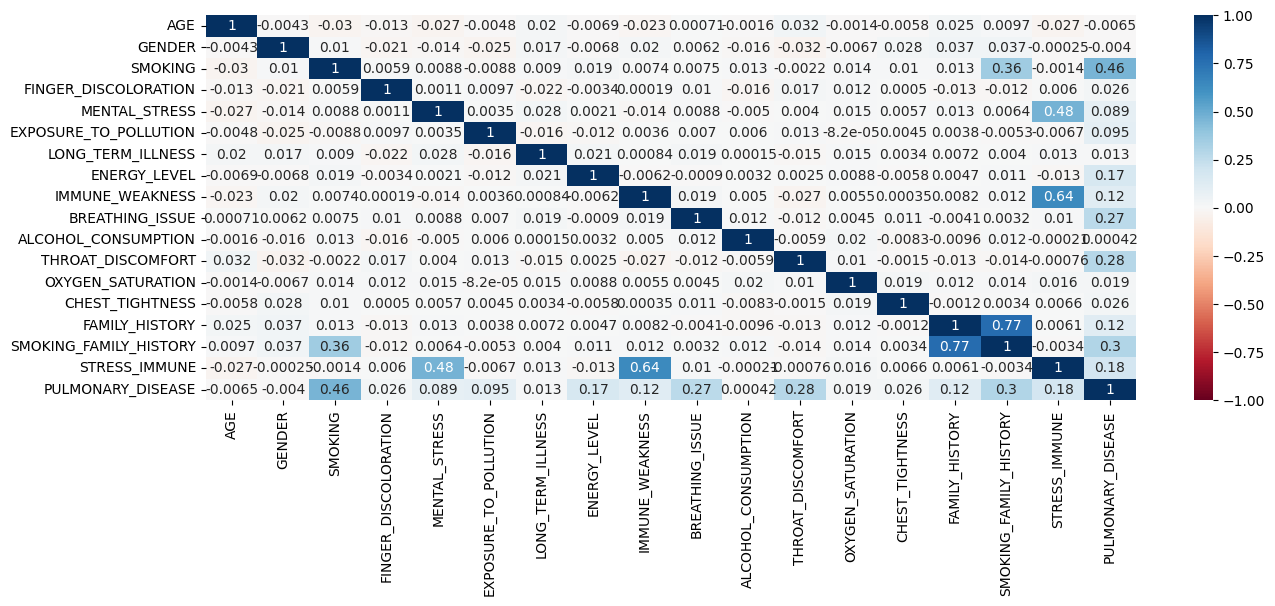

In [12]:
v = df.copy()
v['PULMONARY_DISEASE'] = pd.get_dummies(v['PULMONARY_DISEASE'],dtype=int,drop_first=True)
plt.figure(figsize=(15, 5))
sns.heatmap(v.corr(), annot=True, cmap="RdBu",vmin=-1,)

Smoking, Breathing Issue, Throat discomfort, and Smoking Family history show the highest correlation with the Target.

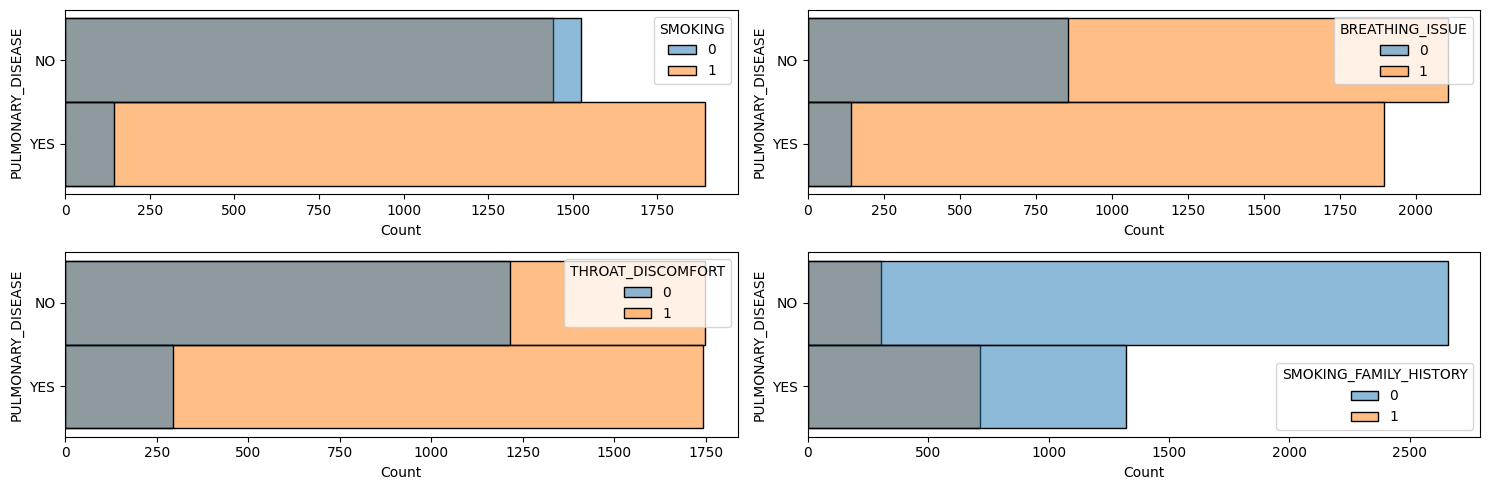

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
sns.histplot(hue= df['SMOKING'],y =df['PULMONARY_DISEASE'],ax=axes[0][0])

sns.histplot(hue= df['BREATHING_ISSUE'],y= df['PULMONARY_DISEASE'],ax=axes[0][1])

sns.histplot(hue= df['THROAT_DISCOMFORT'],y =df['PULMONARY_DISEASE'],ax=axes[1][0])

sns.histplot(hue= df['SMOKING_FAMILY_HISTORY'],y =df['PULMONARY_DISEASE'],ax=axes[1][1])

plt.tight_layout()
plt.show()

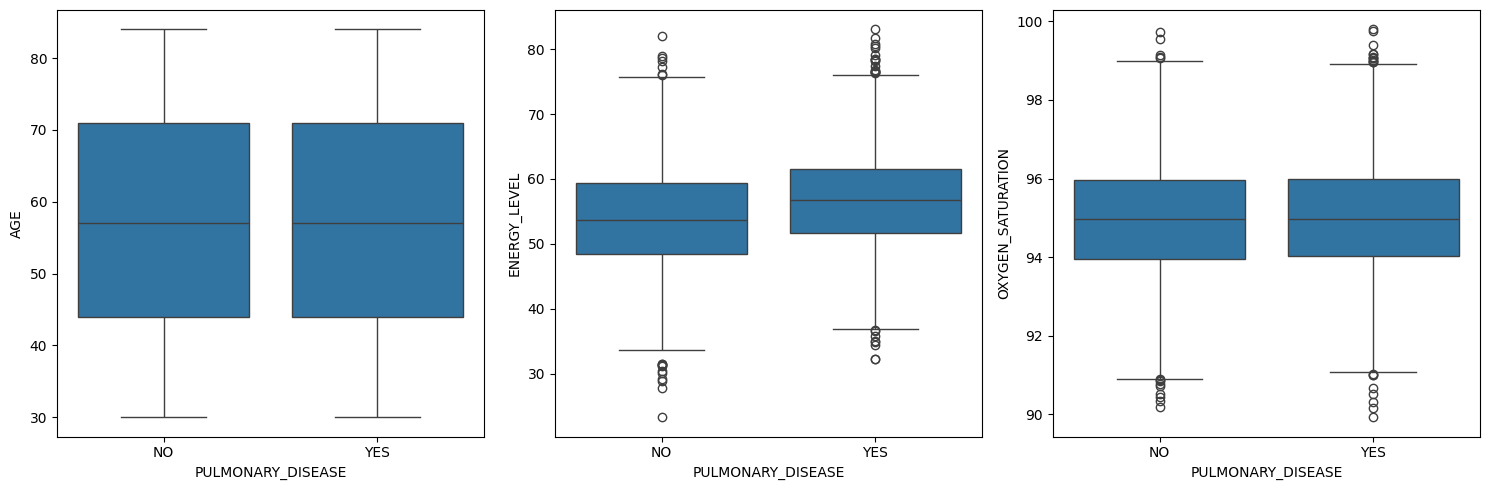

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y= df['AGE'],x =df['PULMONARY_DISEASE'],showfliers=True,ax=axes[0])

sns.boxplot(y= df['ENERGY_LEVEL'],x =df['PULMONARY_DISEASE'],showfliers=True,ax=axes[1])

sns.boxplot(y= df['OXYGEN_SATURATION'],x =df['PULMONARY_DISEASE'],showfliers=True,ax=axes[2])
plt.tight_layout()
plt.show()

In [15]:
def processing(d):

  df_processed = d.copy()

  # Data Preprocessing :

  #target :
  df_processed['PULMONARY_DISEASE'] = pd.get_dummies(df_processed['PULMONARY_DISEASE'],dtype=int,drop_first=True)

  #normalisation :
  scaler = MinMaxScaler()
  data = df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
  scaler.fit(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']] = scaler.transform(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]

  return df_processed

In [16]:
df_full = processing(df)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   float64
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

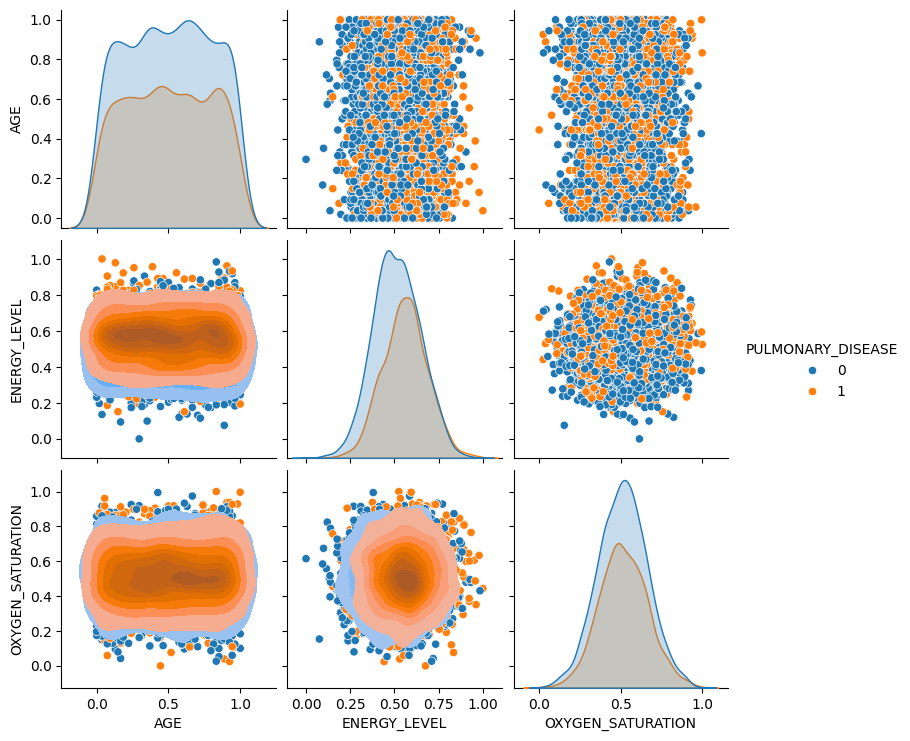

In [17]:
g= sns.pairplot(df_full,vars=['AGE','ENERGY_LEVEL','OXYGEN_SATURATION'],hue='PULMONARY_DISEASE')
g.map_lower(sns.kdeplot, fill=True)

plt.show()

**Modelling**

Imports

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, confusion_matrix, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import pickle


In [19]:
# Train Test split
X = df.drop(columns='PULMONARY_DISEASE')
y = df[['PULMONARY_DISEASE']]

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2 ,stratify = y,random_state=42)

X_tr, X_val ,y_tr, y_val = train_test_split(X_train,y_train, test_size = 0.25 ,stratify = y_train,random_state=42)

In [20]:
# Processing function:

def preProcessing(d,inp_type):

  df_processed = d.copy()


  #target :
  if inp_type == 'target' :
    df_processed['PULMONARY_DISEASE'] = pd.get_dummies(df_processed['PULMONARY_DISEASE'],dtype=int,drop_first=True)
    return df_processed


  #normalisation :
  if inp_type == 'feature' :
    # scaler = MinMaxScaler()
    # data = df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
    # scaler.fit(data)
    # df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']] = scaler.transform(data)
    # df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
    return df_processed


  print("ERROR : undefined input type ")
  return

Preprocessing

In [21]:
## Preprocessing
# y
y_train = preProcessing(y_train,'target')
y_tr = preProcessing(y_tr,'target')
y_val = preProcessing(y_val,'target')
y_test = preProcessing(y_test,'target')

# X
X_train = preProcessing(X_train,'feature')
X_tr = preProcessing(X_tr,'feature')
X_val = preProcessing(X_val,'feature')
X_test = preProcessing(X_test,'feature')

Hyperparameter tuning

In [23]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

params = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 2500, 5000]
    },

    'Random Forest': {
        'n_estimators': [75, 100, 200, 300, 500],
        'max_depth': [2, 3, 4, 5, 6]
    },

    'AdaBoost': {
        'n_estimators': [50, 100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2]
    },

    'XGBoost': {
        'n_estimators': [75, 100, 200, 300, 400, 500],
        'max_depth': [2, 3, 4, 5, 6],
        'learning_rate': [0.05, 0.1, 0.2],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
    }
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv = 5

Grid Search

In [24]:
def result_df(models,params,scoring,refitting_metric,cv,X_tr,y_tr):

  results_table = pd.DataFrame(columns = ['Model','accuracy', 'precision', 'recall', 'f1','roc_auc_score','model_object'] )

  for model_name, model in models.items():

    mod = GridSearchCV(
    model,
    params[model_name],
    scoring =scoring,
    cv=cv,
    refit = refitting_metric,
    n_jobs=20
    )

    mod.fit(X_tr,y_tr)
    model_tuned = mod.best_estimator_

    # Pickle:
    with open(model_name, 'wb') as to_write:
      pickle.dump(model_tuned, to_write)

    with open(model_name, 'rb') as to_read:
      model_tuned = pickle.load(to_read)

    model_tuned_preds = model_tuned.predict(X_val)



    accuracy = accuracy_score(y_val,model_tuned_preds)
    precision = precision_score(y_val,model_tuned_preds)
    f1 = f1_score(y_val,model_tuned_preds)
    recall = recall_score(y_val,model_tuned_preds)
    roc = roc_auc_score(y_val,model_tuned_preds)

    results_table.loc[len(results_table)] = [model_name,accuracy, precision, f1, recall, roc,mod.best_params_]

  return results_table

In [26]:
results = result_df(models,params,scoring,"recall",cv,X_tr,y_tr)

KeyboardInterrupt: 